Dataset Overview:
        Date    Region  BBQ_Meals_Sold  Avg_Spend_£  Profit_Margin_pct  \
0 2025-01-01  Scotland             732         8.27              21.97   
1 2025-01-02     Wales             784         3.78              26.00   
2 2025-01-03     Wales             841         2.29              19.44   
3 2025-01-04   England             470         5.20              24.82   
4 2025-01-05  Scotland            1004         7.01              17.17   

  Age_Group Income_Category  
0     25-34            High  
1     35-44          Medium  
2     25-34            High  
3     45-54          Medium  
4     18-24             Low  

Summary Stats:
                      Date  BBQ_Meals_Sold  Avg_Spend_£  Profit_Margin_pct
count                 1000     1000.000000  1000.000000        1000.000000
mean   2026-05-15 12:00:00      627.551000     5.076420          22.043350
min    2025-01-01 00:00:00       50.000000     2.000000           6.800000
25%    2025-09-07 18:00:00      331.50000

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_86017/652448885.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=bbq_df, x='Region', y='BBQ_Meals_Sold', ci=None)


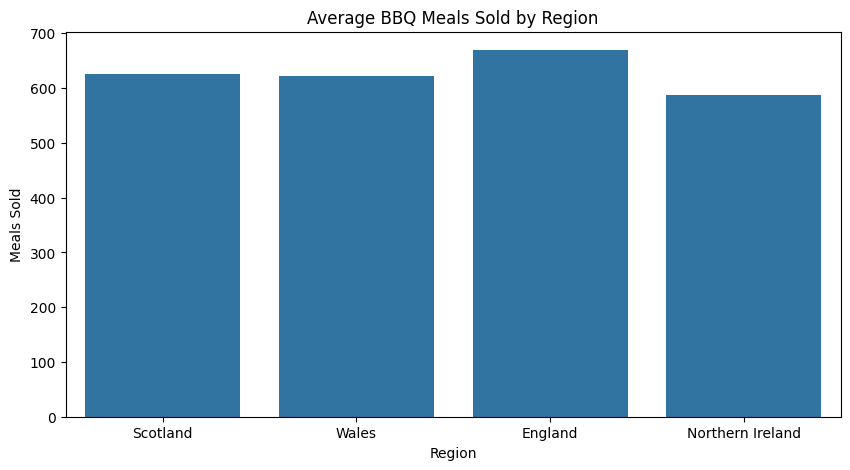

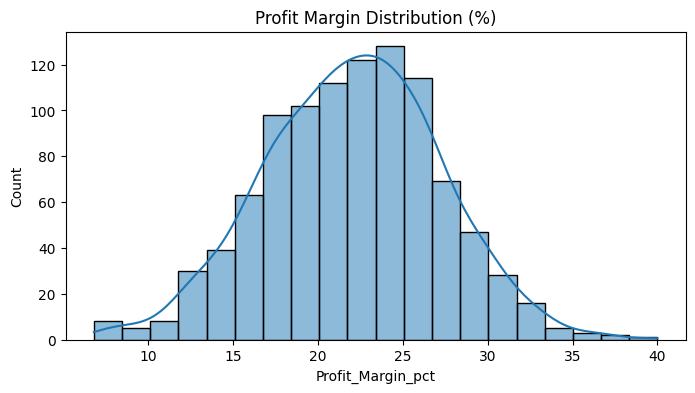

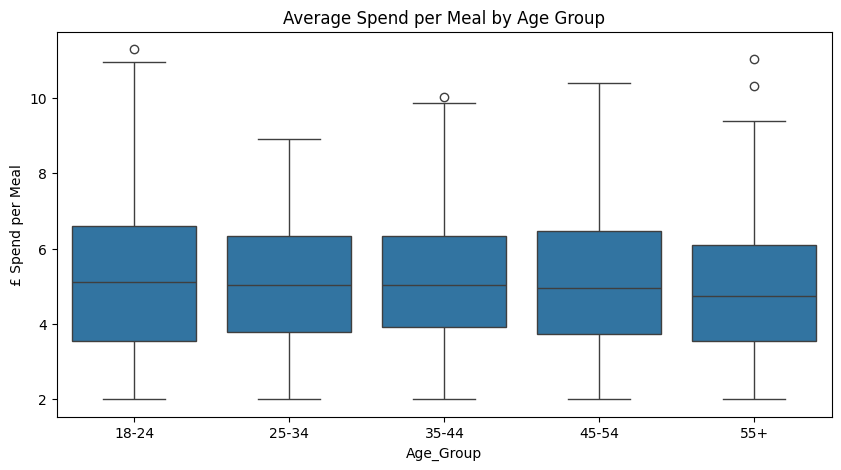


Average Spend & Profit by Income Category:
                 Avg_Spend_£  Profit_Margin_pct
Income_Category                                
High                4.963971          22.382800
Low                 5.181081          21.567958
Medium              5.090631          22.167950

Dataset exported: uk_bbq_sales_analysis.csv


In [1]:
# -----------------------------------------------------------------------------
# UK_BBQ_SALES_DEMOGRAPHICS.ipynb
# -----------------------------------------------------------------------------
# Objective: Create & analyze a synthetic dataset describing BBQ meals in the UK
# -----------------------------------------------------------------------------

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------
# 1️⃣ Step 1 — Define Synthetic Data Schema
# -----------------------------------------------------------------------------
# We'll simulate:
# - Date
# - Region (e.g., England, Scotland, Wales, N. Ireland)
# - BBQ Meals Sold (units)
# - Average Spend per Meal (£)
# - Profit Margin (%)
# - Consumer Age Group
# - Income Category

np.random.seed(2026)  # for reproducibility

# Possible categories
regions = ['England','Scotland','Wales','Northern Ireland']
age_groups = ['18-24','25-34','35-44','45-54','55+']
income_category = ['Low','Medium','High']

# -----------------------------------------------------------------------------
# 2️⃣ Step 2 — Create a Synthetic Dataset
# -----------------------------------------------------------------------------
n_samples = 1000

data = {
    'Date': pd.date_range(start='2025-01-01', periods=n_samples, freq='D'),
    'Region': np.random.choice(regions, n_samples),
    'BBQ_Meals_Sold': np.random.randint(50, 1200, size=n_samples),
    'Avg_Spend_£': np.round(np.random.normal(loc=5.0, scale=2.0, size=n_samples),2),
    'Profit_Margin_pct': np.round(np.random.normal(loc=22.0, scale=5.0, size=n_samples),2),
    'Age_Group': np.random.choice(age_groups, n_samples),
    'Income_Category': np.random.choice(income_category, n_samples),
}

bbq_df = pd.DataFrame(data)

# Replace unreasonable values
bbq_df['Avg_Spend_£'] = bbq_df['Avg_Spend_£'].clip(lower=2.0)
bbq_df['Profit_Margin_pct'] = bbq_df['Profit_Margin_pct'].clip(lower=5.0, upper=40.0)

# -----------------------------------------------------------------------------
# 3️⃣ Step 3 — Basic Inspection
# -----------------------------------------------------------------------------
print("Dataset Overview:")
print(bbq_df.head())
print("\nSummary Stats:")
print(bbq_df.describe())

# -----------------------------------------------------------------------------
# 4️⃣ Step 4 — Analysis & Visualizations
# -----------------------------------------------------------------------------
plt.figure(figsize=(10,5))
sns.barplot(data=bbq_df, x='Region', y='BBQ_Meals_Sold', ci=None)
plt.title('Average BBQ Meals Sold by Region')
plt.ylabel('Meals Sold')
plt.show()

# Profit Margin Distribution
plt.figure(figsize=(8,4))
sns.histplot(bbq_df['Profit_Margin_pct'], bins=20, kde=True)
plt.title('Profit Margin Distribution (%)')
plt.show()

# Age Group vs Avg Spend
plt.figure(figsize=(10,5))
sns.boxplot(data=bbq_df, x='Age_Group', y='Avg_Spend_£', order=age_groups)
plt.title('Average Spend per Meal by Age Group')
plt.ylabel('£ Spend per Meal')
plt.show()

# -----------------------------------------------------------------------------
# 5️⃣ Step 5 — Grouped Insights
# -----------------------------------------------------------------------------
# Average spend & profit by income category
summary_inc = bbq_df.groupby('Income_Category')[['Avg_Spend_£','Profit_Margin_pct']].mean()
print("\nAverage Spend & Profit by Income Category:")
print(summary_inc)

# -----------------------------------------------------------------------------
# 6️⃣ Step 6 — Export for Reporting
# -----------------------------------------------------------------------------
bbq_df.to_csv('uk_bbq_sales_analysis.csv', index=False)
print("\nDataset exported: uk_bbq_sales_analysis.csv")